In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from prophet import Prophet
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae,mean_squared_error as mse,r2_score

Data Collection & processing

Dataset [Air pollution data of india 2020-2023](https://www.kaggle.com/datasets/seshupavan/air-pollution-data-of-india-2020-2023)

AQI range - 1 to 5

In [ ]:
data = pd.read_csv('/content/air_pollution_data.csv')

In [ ]:
data.head() #print top 5 rows of dataset

,city,date,aqi,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,Ahmedabad,30-11-2020,5,520.71,2.38,16.28,130.18,47.68,65.96,72.13,8.36
1,Ahmedabad,01-12-2020,5,1682.28,7.71,54.84,0.73,21.70,120.95,154.53,27.36
2,Ahmedabad,02-12-2020,5,1815.80,16.54,49.35,0.17,23.84,133.47,172.63,28.12
3,Ahmedabad,03-12-2020,5,2296.45,41.57,40.10,0.00,35.76,150.37,202.15,36.48
4,Ahmedabad,04-12-2020,5,2189.64,23.92,58.95,0.02,28.13,160.79,205.80,40.53


In [ ]:
data.tail() #last 5 rows

,city,date,aqi,co,no,no2,o3,so2,pm2_5,pm10,nh3
23499,Visakhapatnam,21-05-2023,3,353.81,0.0,2.08,100.14,4.11,37.53,47.09,0.08
23500,Visakhapatnam,22-05-2023,3,380.52,0.0,3.77,82.97,5.07,32.17,43.44,1.74
23501,Visakhapatnam,23-05-2023,3,390.53,0.0,4.28,80.11,5.19,36.01,48.06,1.20
23502,Visakhapatnam,24-05-2023,3,300.41,0.0,1.36,95.84,2.21,30.17,48.89,0.00
23503,Visakhapatnam,25-05-2023,4,427.25,0.0,6.00,88.69,10.73,52.36,61.41,0.20


In [ ]:
data.shape

(23504, 11)

In [ ]:
# check missing value
data.isnull().sum()


,0
city,0
date,0
aqi,0
co,0
no,0
no2,0
o3,0
so2,0
pm2_5,0
pm10,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23504 entries, 0 to 23503
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   city    23504 non-null  object 
 1   date    23504 non-null  object 
 2   aqi     23504 non-null  int64  
 3   co      23504 non-null  float64
 4   no      23504 non-null  float64
 5   no2     23504 non-null  float64
 6   o3      23504 non-null  float64
 7   so2     23504 non-null  float64
 8   pm2_5   23504 non-null  float64
 9   pm10    23504 non-null  float64
 10  nh3     23504 non-null  float64
dtypes: float64(8), int64(1), object(2)
memory usage: 2.0+ MB


Data Analysis**(EDA)**

In [ ]:
import plotly.express as px

fig = px.scatter(data,x='pm2_5',y='aqi')
fig.show()

In [ ]:
fig_no2 = px.scatter(data,x='no2',y='aqi')
fig_no2.show()

In [ ]:
fig_co = px.scatter(data,x='co',y='aqi')
fig_co.show()

**Data Analysis**

In [ ]:
x = data.iloc[:,3:11].values
y = data.iloc[:,2].values

In [ ]:
x_train , x_test ,y_train , y_test = train_test_split(x,y ,test_size=0.2,random_state=42)
print(f"Training Set: {x_train.shape}\nTesting Set: {x_test.shape}")

Training Set: (18803, 8)
Testing Set: (4701, 8)


In [ ]:
models = dict()

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [ ]:
decisionTree = DecisionTreeRegressor()
# Train the model
decisionTree.fit(x_train, y_train)
# Make predictions on the test set
train_tree = str(round(decisionTree.score(x_train, y_train)*100,2))
test_tree = str(round(decisionTree.score(x_test, y_test)*100,2))
print(f"Training Set: {train_tree}%\nTesting Set: {test_tree}%")
models["Decision Tree"]=test_tree

Training Set: 100.0%
Testing Set: 94.72%


In [ ]:
print("MAE:{}".format(mae(y_test,decisionTree.predict(x_test))*100,2))
print("MSE:{}".format(mse(y_test,decisionTree.predict(x_test))*100,2))
print("R2:{}".format(r2_score(y_test,decisionTree.predict(x_test))*100,2))

MAE:10.57221867687726
MSE:10.614762816422038
R2:94.71970865420717


In [ ]:
linear_reg = LinearRegression()
linear_reg.fit(x_train,y_train)

LinearRegression()

In [ ]:
train_linreg = str(round(linear_reg.score(x_train, y_train)*100,2))
test_linreg = str(round(linear_reg.score(x_test, y_test)*100,2))
print(f"Training Set: {train_linreg}%\nTesting Set: {test_linreg}%")
models["Linear Regression"]=test_linreg

Training Set: 34.53%
Testing Set: 33.03%


In [ ]:
# Linear regression
print(f"MAE: {mae(y_test,y_pred)}")
print(f"MSE: {mse(y_test,y_pred)}")
print(f"R2: {r2_score(y_test,y_pred)}")


MAE: 0.10726015741331632
MSE: 0.05348025951925123
R2: 0.9733963578466991


In [ ]:
random_forest = RandomForestRegressor()
# Train the model
random_forest.fit(x_train, y_train)

train_forest = str(round(random_forest.score(x_train, y_train)*100,2))
test_forest = str(round(random_forest.score(x_test, y_test)*100,2))
print("Random Forest Regressor")
print(f"Training Set: {random_forest.score(x_train, y_train)*100}\nTesting Set: {random_forest.score(x_test, y_test)*100}")
models["Random Forest"] = test_forest

Random Forest Regressor
Training Set: 99.6093033419383
Testing Set: 97.3303280807265


In [ ]:
print("MAE:{}".format(mae(y_test,random_forest.predict(x_test))))
print("MSE:{}".format(mse(y_test,random_forest.predict(x_test))))
print(f"R2: {r2_score(y_test,random_forest.predict(x_test))*100}")

MAE:0.10753669432035737
MSE:0.05366736864496916
R2: 97.3303280807265


In [ ]:
svm = SVR()
svm.fit(x_train, y_train)


SVR()

In [ ]:
train_svm = str(round(svm.score(x_train, y_train)*100,2))
test_svm = str(round(svm.score(x_test, y_test)*100,2))
print(f"Training Set: {train_svm}%\nTesting Set: {test_svm}%")
models['SVM'] = test_svm

Training Set: 84.75%
Testing Set: 85.0%


In [ ]:
print("MAE:{}".format(mae(y_test,svm.predict(x_test))))
print("MSE:{}".format(mse(y_test,svm.predict(x_test))))
print(f"R2: {r2_score(y_test,svm.predict(x_test))*100}")

MAE:0.3867458327716291
MSE:0.30159262403580606
R2: 84.99733861045418


In [ ]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
train_xgb = str(round(xgb.score(x_train, y_train)*100,2))
test_xgb = str(round(xgb.score(x_test, y_test)*100,2))
print(f"Training Set: {train_xgb}%\nTesting Set: {test_xgb}%")
models['XGBoost'] = test_xgb

Training Set: 99.05%
Testing Set: 96.95%


In [ ]:
# XGB regression
print("MAE:{}".format(mae(y_test,xgb.predict(x_test))))
print("MSE:{}".format(mse(y_test,xgb.predict(x_test))))
print(f"R2: {r2_score(y_test,xgb.predict(x_test))*100}")

MAE:0.1216065253483136
MSE:0.061303336213107816
R2: 96.95047736167908


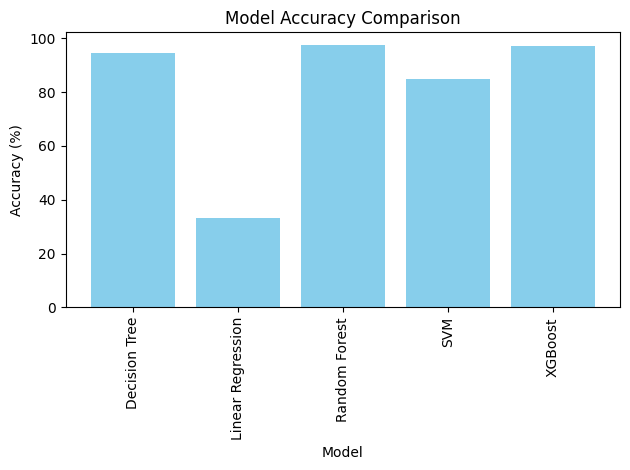

In [ ]:
model_name = list(models.keys())
accuracy = [float(val) if isinstance(val, str) else float(val[0]) if isinstance(val, (np.ndarray, list)) and len(val) > 0 else float('nan') for val in models.values()]

# Plot the bar chart
plt.bar(model_name, accuracy, color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=90)  # Rotate model names for better visibility
plt.tight_layout()       # Adjust layout to fit labels
plt.show()

Forecasting Model:**FB Prophet Algorihtm**

Regression Model

**Regression model**




In [ ]:
# point wh x = 0 and line touches the y axis
linear_reg.intercept_

2.8037483242110617

In [ ]:
linear_reg.coef_


array([-5.99485890e-04, -6.49056278e-04,  2.43401415e-02,  9.96088965e-03,
       -1.76481488e-03, -4.44542001e-05,  6.25401131e-03,  8.23056847e-03])

coefficent represents the direct relationsip wiht the aqi.
1 unit change in co will dec the aqi by - 0.000613 = -0.06%

In [ ]:
coef_data = pd.DataFrame(data=linear_reg.coef_,index=data.columns[3:11],columns=['coefficient'])
coef_data

,coefficient
co,-0.000599
no,-0.000649
no2,0.024340
o3,0.009961
so2,-0.001765
pm2_5,-0.000044
pm10,0.006254
nh3,0.008231


In [ ]:
# converting the date from DD-MM-YYYY to YYYY-MM-DD

date_info = pd.to_datetime(data['date'])
date_info

,date
0,2020-11-30
1,2020-12-01
2,2020-12-02
3,2020-12-03
4,2020-12-04
...,...
23499,2023-05-21
23500,2023-05-22
23501,2023-05-23
23502,2023-05-24


In [ ]:
print(type(date_info))

<class 'pandas.core.series.Series'>


In [ ]:
df = pd.DataFrame()

In [ ]:
df['ds'] = pd.to_datetime(data['date'])
df['y'] = data['aqi']

In [ ]:
df.head()

,ds,y
0,2020-11-30,5
1,2020-12-01,5
2,2020-12-02,5
3,2020-12-03,5
4,2020-12-04,5


In [ ]:
# Training prophet model
model = Prophet()
model.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnij8o0pq/wx093qbu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnij8o0pq/9zi7by0b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45851', 'data', 'file=/tmp/tmpnij8o0pq/wx093qbu.json', 'init=/tmp/tmpnij8o0pq/9zi7by0b.json', 'output', 'file=/tmp/tmpnij8o0pq/prophet_modelid9yzj5s/prophet_model-20241128110009.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:00:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:00:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = model.make_future_dataframe(periods=365)
future.tail()

,ds
1264,2024-05-20
1265,2024-05-21
1266,2024-05-22
1267,2024-05-23
1268,2024-05-24


In [ ]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1264,2024-05-20,2.199112,0.717317,3.866700
1265,2024-05-21,2.307362,0.756964,3.737291
1266,2024-05-22,2.289880,0.708295,3.755383
1267,2024-05-23,2.312448,0.738211,3.879028
1268,2024-05-24,2.295154,0.686411,3.819578


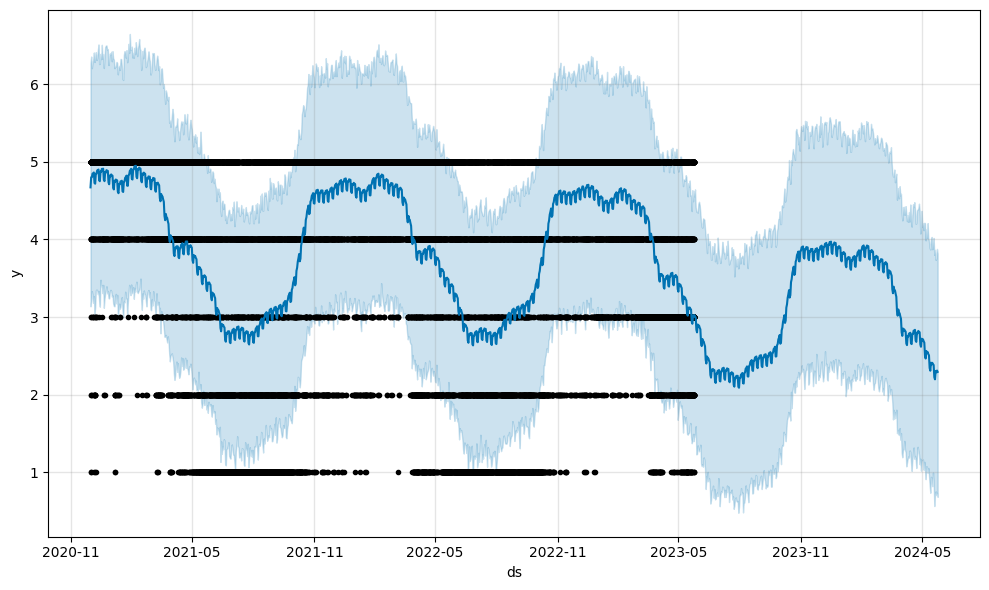

In [ ]:
fig1 = model.plot(forecast)

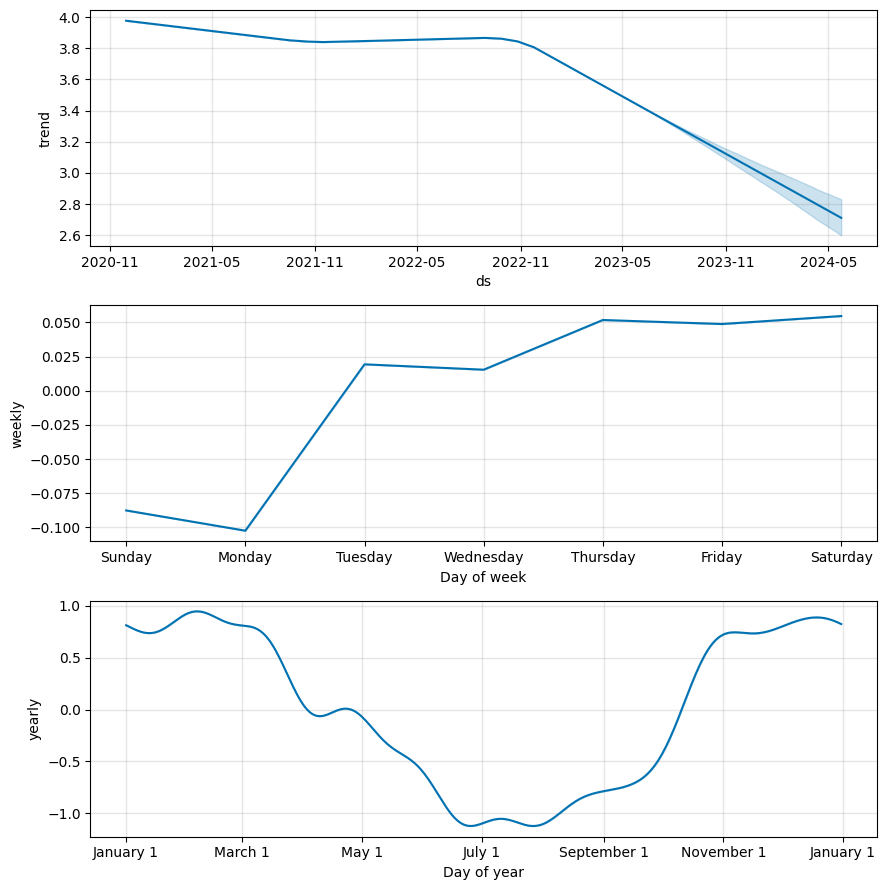

In [ ]:
fig2 = model.plot_components(forecast)



In [ ]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(model, forecast)

In [ ]:
plot_components_plotly(model, forecast)

In [255]:
def AQI_predict(city, date, data, model=random_forest):
    """
    Predicts the AQI based on city and date.

    Args:
        city (str): The name of the city.
        date (str): The date in 'YYYY-MM-DD' format.
        data (pd.DataFrame): The original dataframe containing pollution data.
        model: The trained model to use for prediction. Defaults to random_forest.

    Returns:
        int: The predicted AQI value.
    """

    # 1. Convert 'date' column to datetime objects if it's not already:
    data['date'] = pd.to_datetime(data['date'])

    # 2. Filter data for the specific city and date:
    city_data = data[(data['city'] == city) & (data['date'] == pd.to_datetime(date))]

    if city_data.empty:
        print(f"No data found for {city} on {date}. Returning NaN.")
        return np.nan

    # 3. Check if 'pb' and 'benzene' columns are present, and if not, add them with 0 values:
    missing_cols = ['pb', 'benzene']
    for col in missing_cols:
        if col not in city_data.columns:
            city_data[col] = 0  # Or any other suitable default value

    # Select the relevant features for prediction (same as those used for training)
    prediction_array = city_data[['pm2_5', 'no2', 'co', 'o3', 'so2', 'nh3', 'pb', 'benzene']].values

    # Make prediction
    pred = model.predict(prediction_array)

    return int(round(pred[0]))

In [256]:
score_list = []
actual_list = []

In [257]:
city='Patna'
score = AQI_predict(city, date='2020-12-04', data=data)  # Pass the 'data' DataFrame explicitly
print(f'Predicted Score : {score} || Actual Score : 5')
score_list.append(score)
actual_list.append(5)

Predicted Score : 4 || Actual Score : 5


In [258]:
city='Shillong'
score = AQI_predict(city, date='2023-05-21', data=data)  # Pass the 'data' DataFrame explicitly
print(f'Predicted Score : {score} || Actual Score : 2')
score_list.append(score)
actual_list.append(2)

Predicted Score : 2 || Actual Score : 2
